In [1]:
!pip install histograms

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
from histograms import histograms


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn import datasets
from sklearn.datasets import make_classification

C:\ProgramData\Anaconda3\lib\site-packages\histograms\utils.py:6: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import MultiIndex


In [3]:
ff_dataset = pd.read_csv("Coca-Cola_1962-1967.csv");
ff_dataset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0
1,1962-01-03,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0
2,1962-01-04,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0
3,1962-01-05,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0
4,1962-01-08,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0


In [6]:
ff_dataset.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
15117,2022-01-20,61.000000,61.439999,60.720001,60.750000,23002400,0.0,0.0
15118,2022-01-21,61.080002,61.299999,60.400002,60.450001,26641500,0.0,0.0
15119,2022-01-24,59.900002,60.349998,58.570000,59.959999,30207500,0.0,0.0
15120,2022-01-25,59.360001,60.049999,58.689999,59.820000,19027100,0.0,0.0
15121,2022-01-26,59.790001,60.349998,59.209999,59.599998,19187900,0.0,0.0


In [7]:
ff_dataset.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15122.000000,15122.000000,15122.000000,15122.000000,1.512200e+04,15122.000000,15122.000000
mean,11.447917,11.538120,11.356417,11.450677,9.047438e+06,0.001612,0.001124
std,14.380665,14.479410,14.280585,14.381838,7.940358e+06,0.020525,0.049454
min,0.037983,0.038112,0.035669,0.037855,7.680000e+04,0.000000,0.000000
25%,0.242461,0.244324,0.240176,0.242506,2.823500e+06,0.000000,0.000000
50%,4.786361,4.863934,4.718496,4.792653,7.598100e+06,0.000000,0.000000
75%,17.269736,17.519933,17.057805,17.311344,1.293730e+07,0.000000,0.000000
max,61.080002,61.450001,60.720001,61.389999,1.241690e+08,0.420000,3.000000


In [8]:
ff_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15122 entries, 0 to 15121
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15122 non-null  object 
 1   Open          15122 non-null  float64
 2   High          15122 non-null  float64
 3   Low           15122 non-null  float64
 4   Close         15122 non-null  float64
 5   Volume        15122 non-null  int64  
 6   Dividends     15122 non-null  float64
 7   Stock Splits  15122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 945.2+ KB


In [9]:
ff_dataset.shape

(15122, 8)

In [10]:
ff_dataset.nunique()
ff_dataset['Date'].unique()

array(['1962-01-02', '1962-01-03', '1962-01-04', ..., '2022-01-24',
       '2022-01-25', '2022-01-26'], dtype=object)

Identifying NULL Values

In [11]:
ff_dataset.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Duplicate Values


In [12]:
duplicate = ff_dataset.duplicated()
print("Total duplicated: ", duplicate.sum())
ff_dataset[duplicate]

Total duplicated:  0


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits


Correlation

In [13]:
correlation = ff_dataset.corr()

Text(0.5, 1.0, 'Seaborn heatmap - Correlation between all Variables')

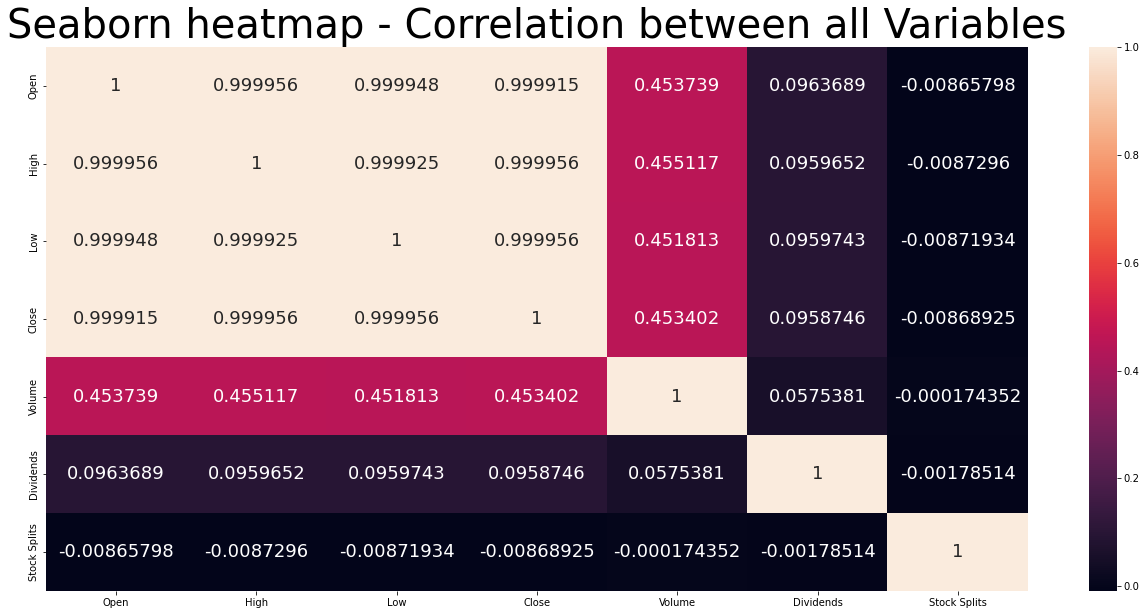

In [15]:
plt.figure(figsize=(22,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True,annot_kws={"size": 18}, fmt='g')
plt.title('Seaborn heatmap - Correlation between all Variables', fontsize = 40)


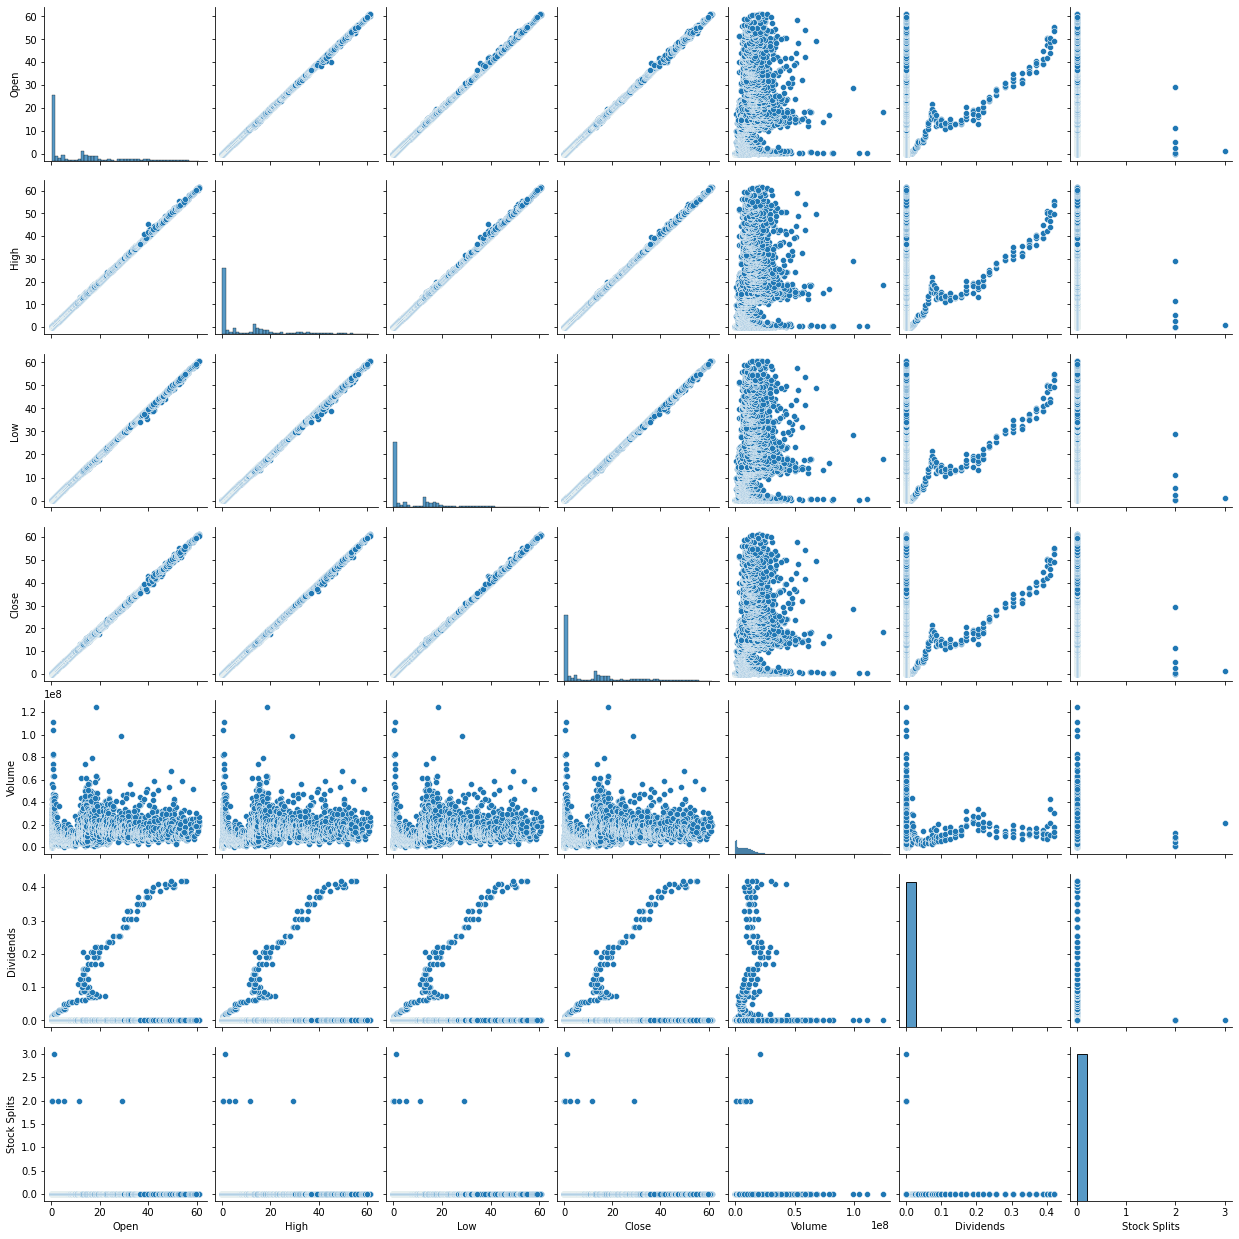

In [17]:
#Pair Grid
sns.pairplot(ff_dataset)

Some Graphs - using Full data set (ff_dataset)


In [21]:
columnnames =['Open', 'High', 'Low', 'Close', 'Dividends', 'Stock Splits']
#columnnames =list(ff_dataset.columns)

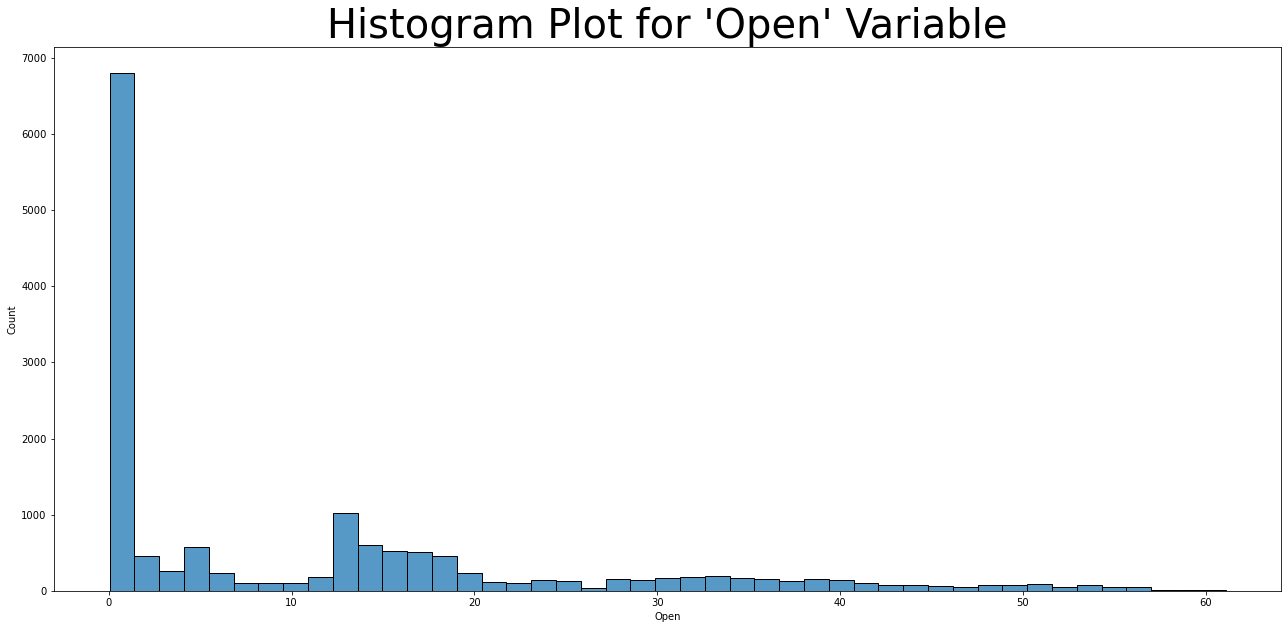

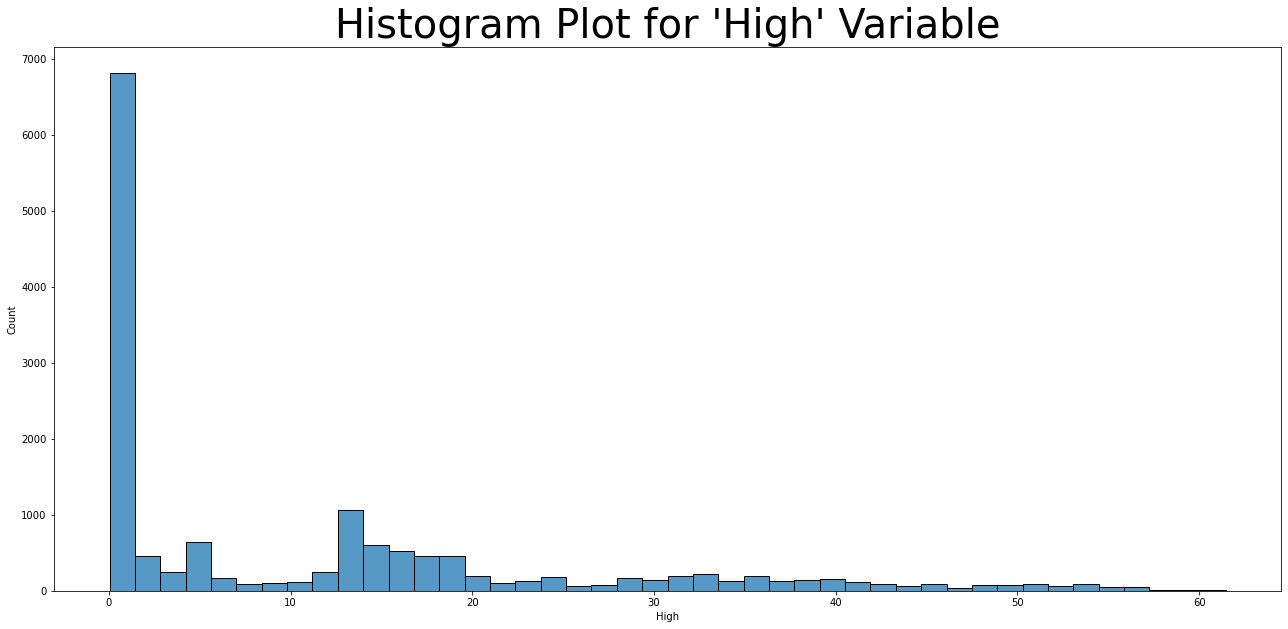

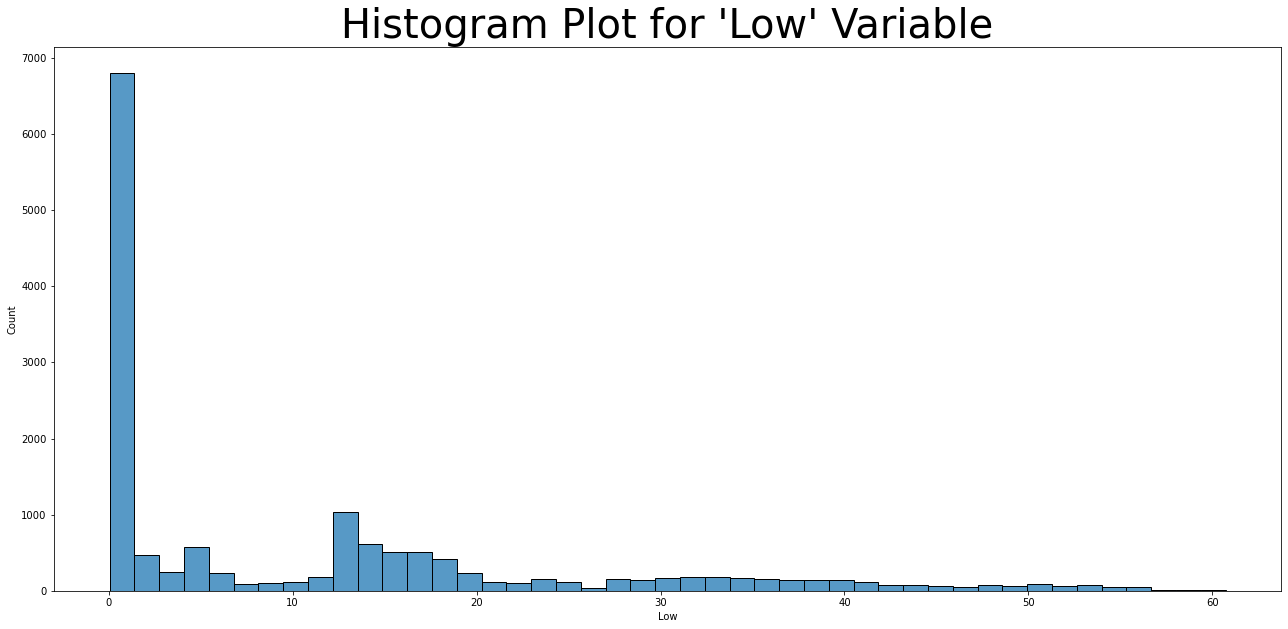

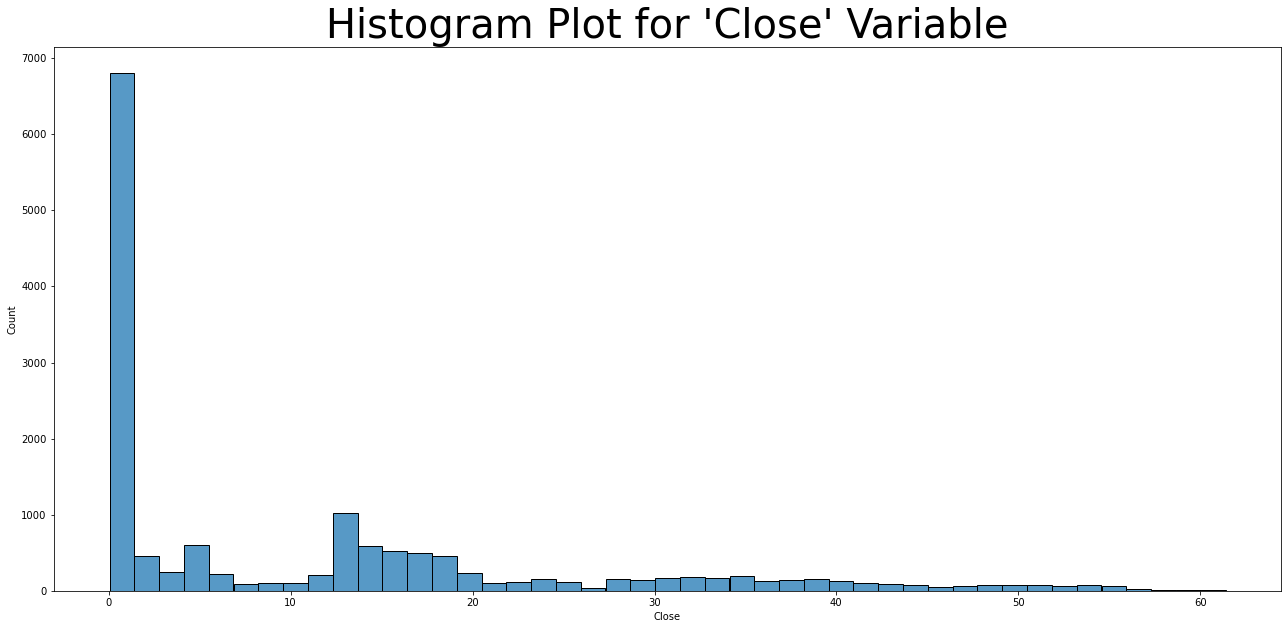

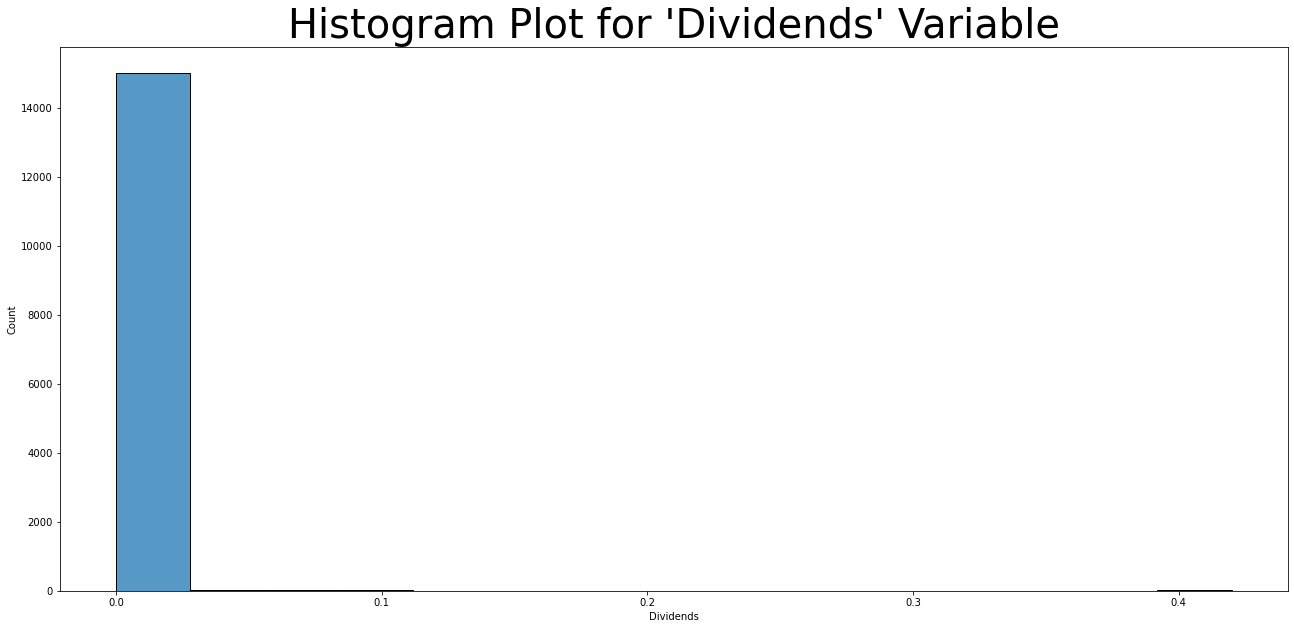

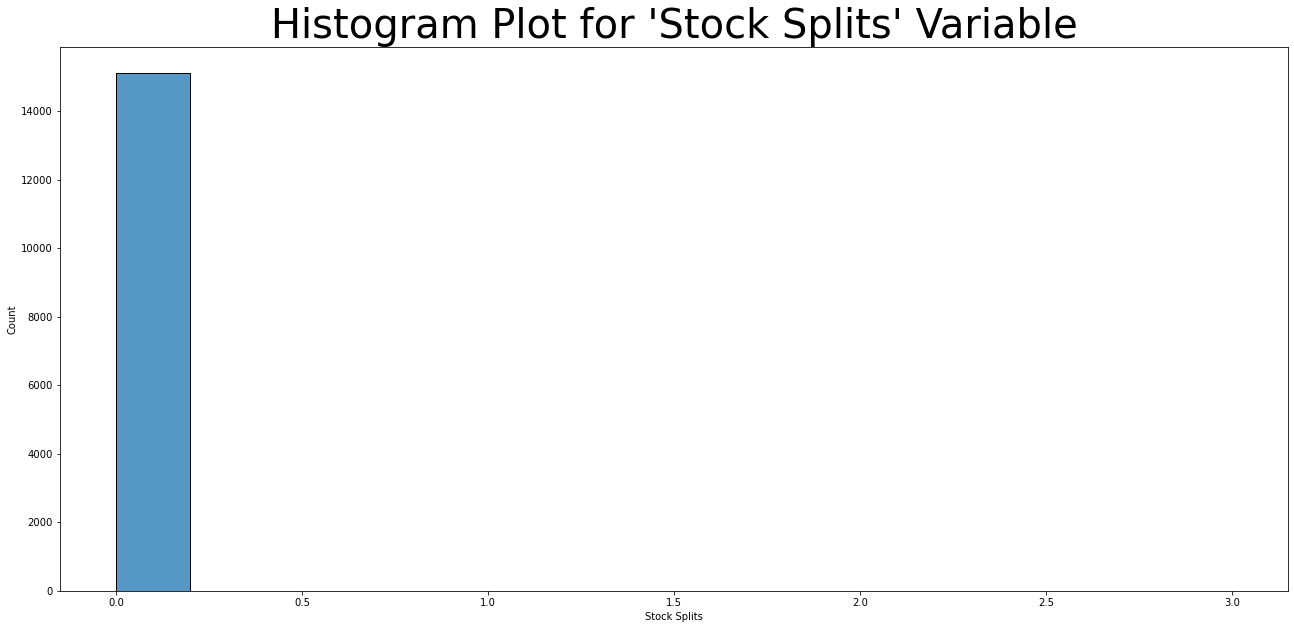

In [22]:
for columnname in columnnames:
    plt.figure(figsize=(22,10))
    sns.histplot(ff_dataset[columnname])
    plt.title("Histogram Plot for '"+ columnname+ "' Variable", fontsize = 40)
    plt.show()

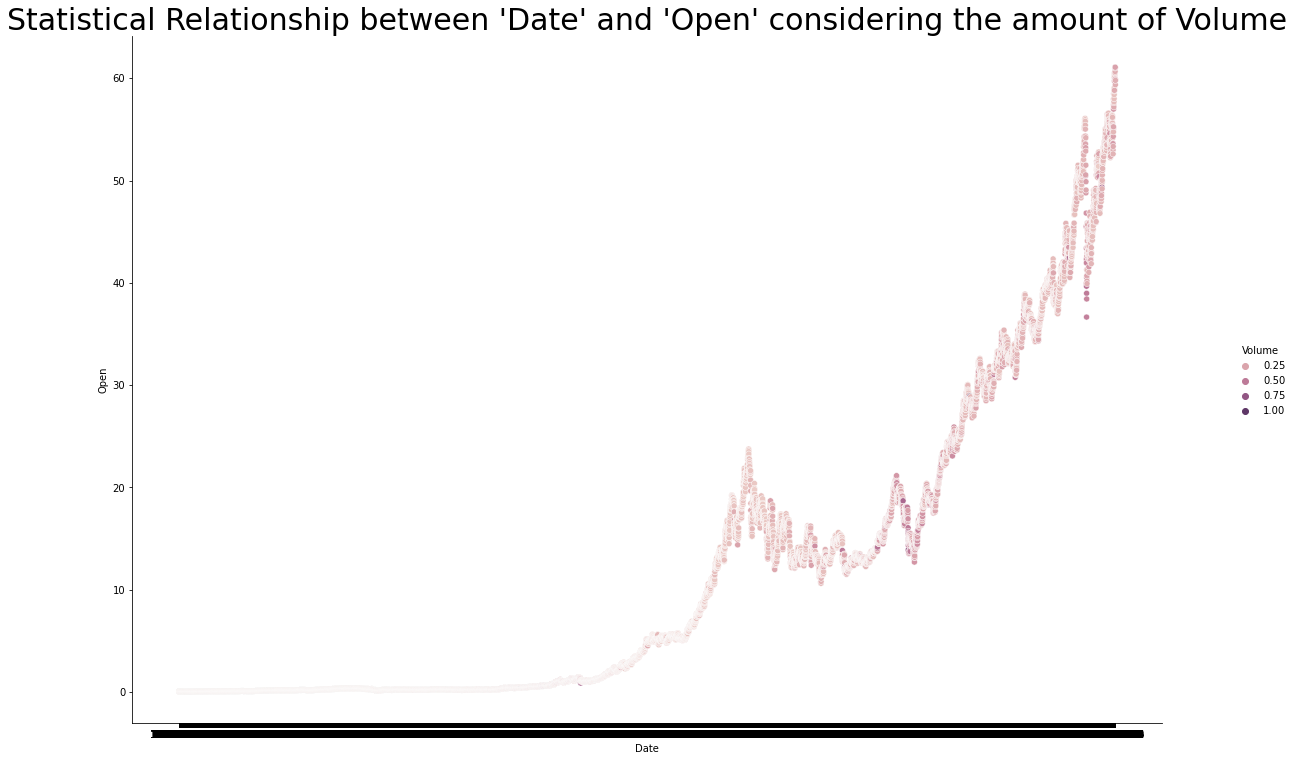

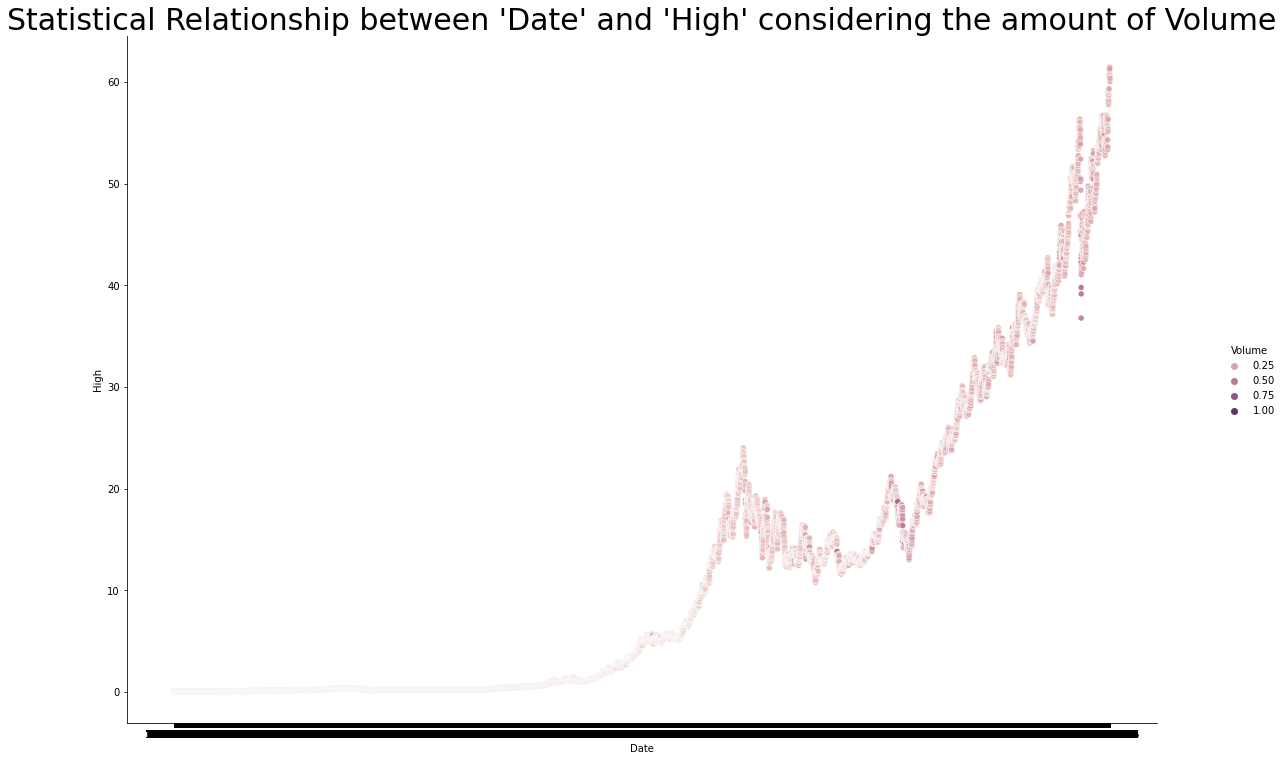

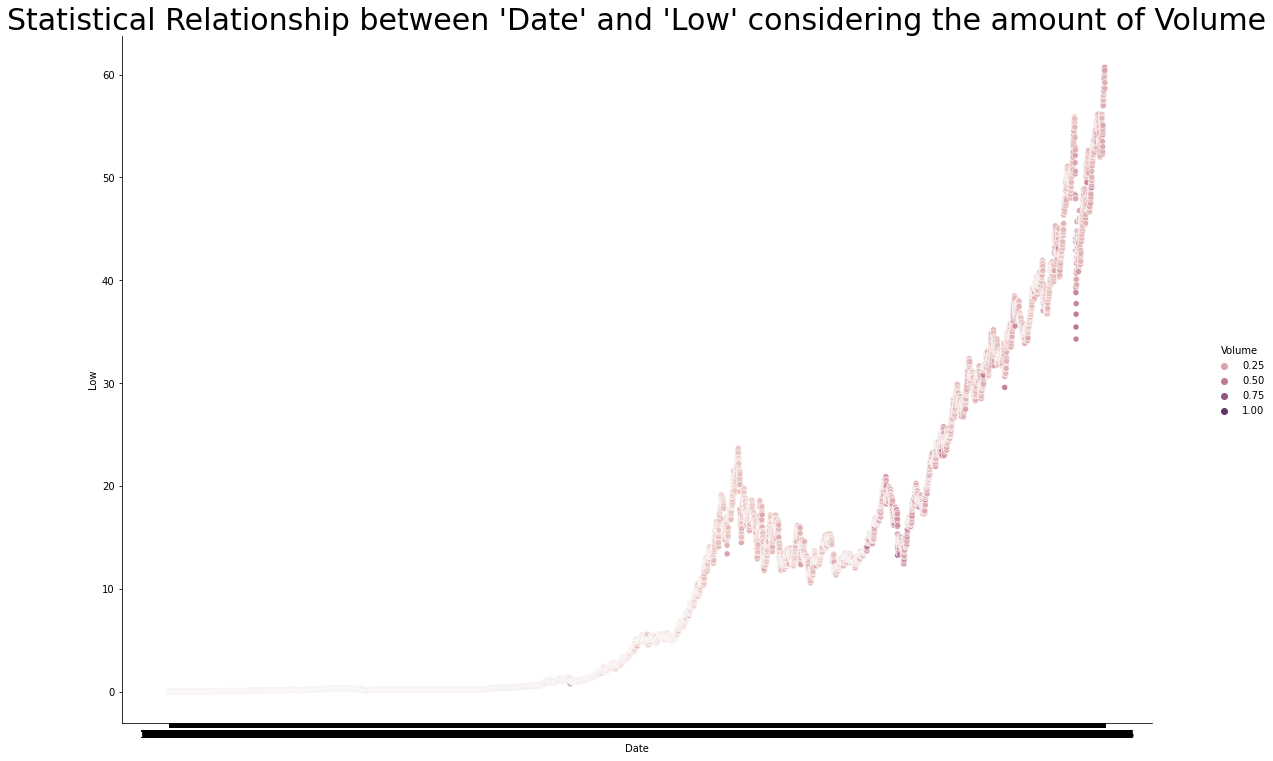

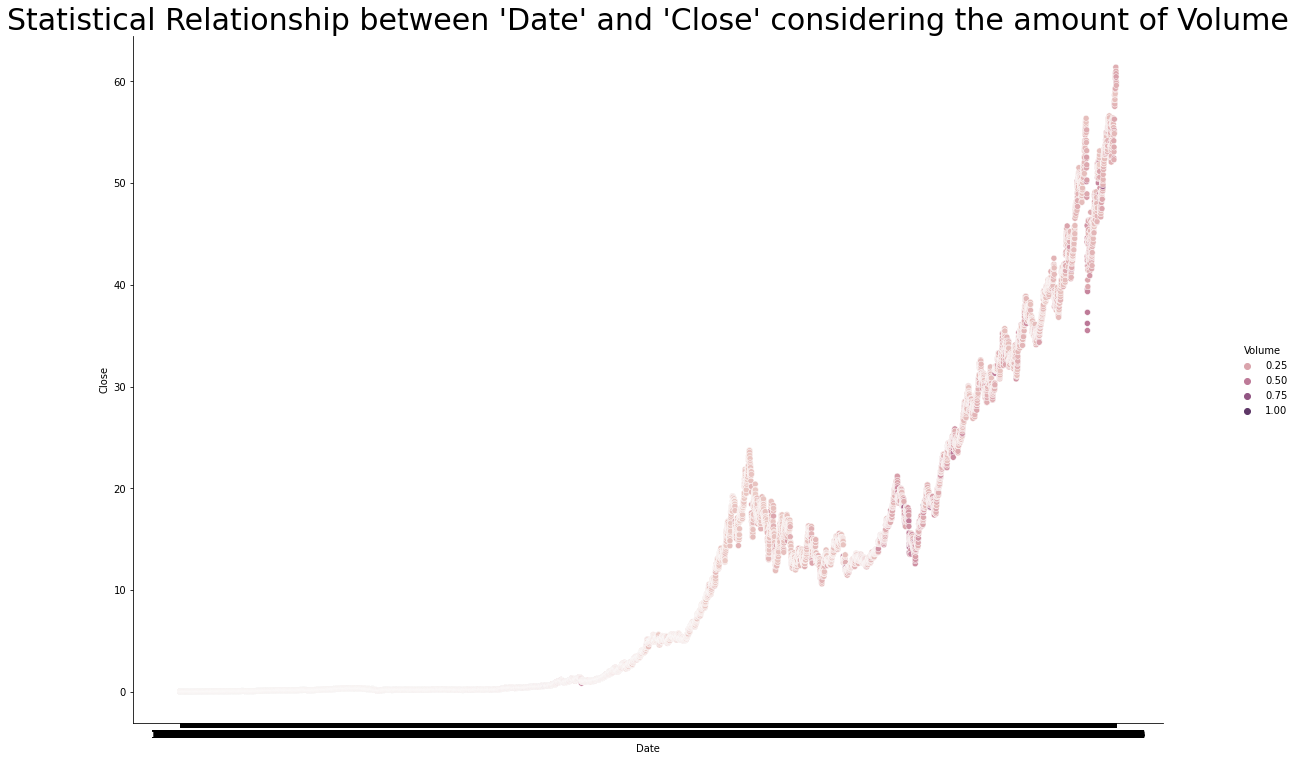

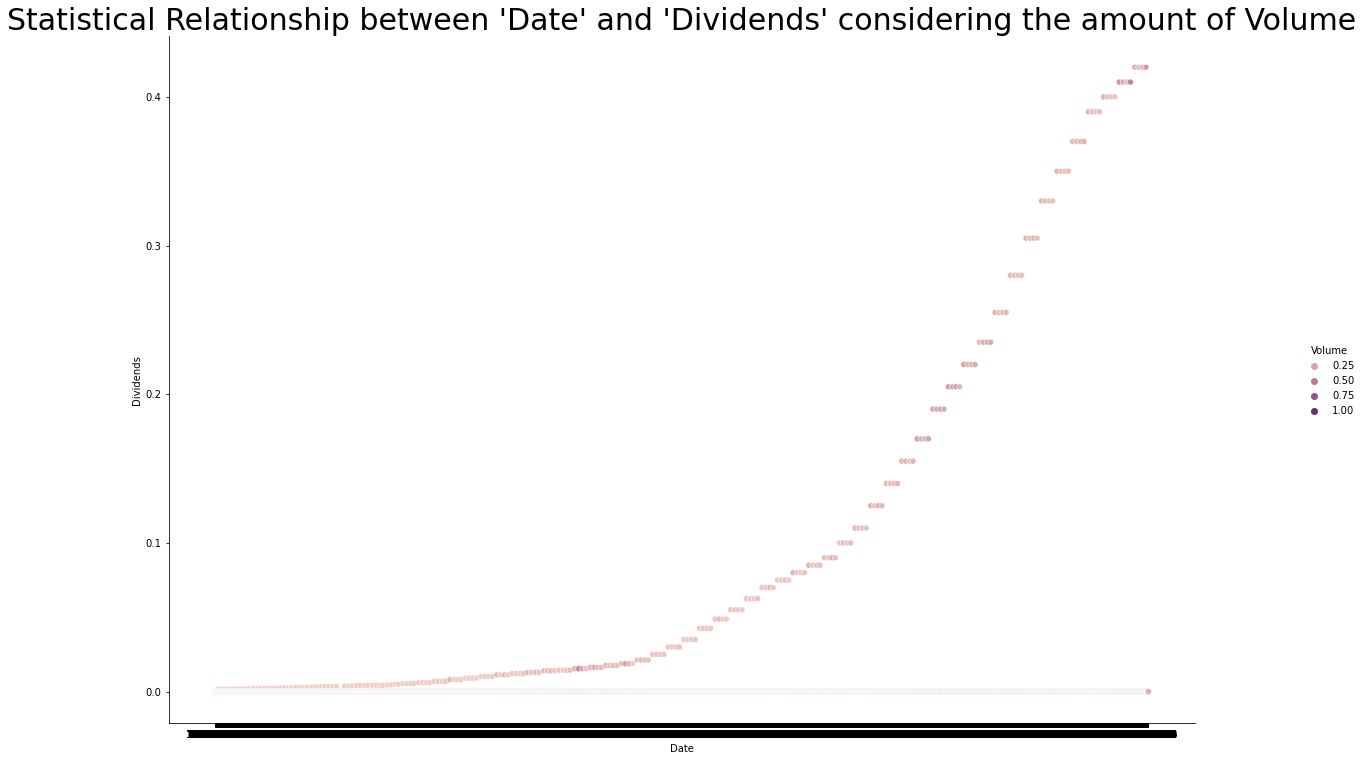

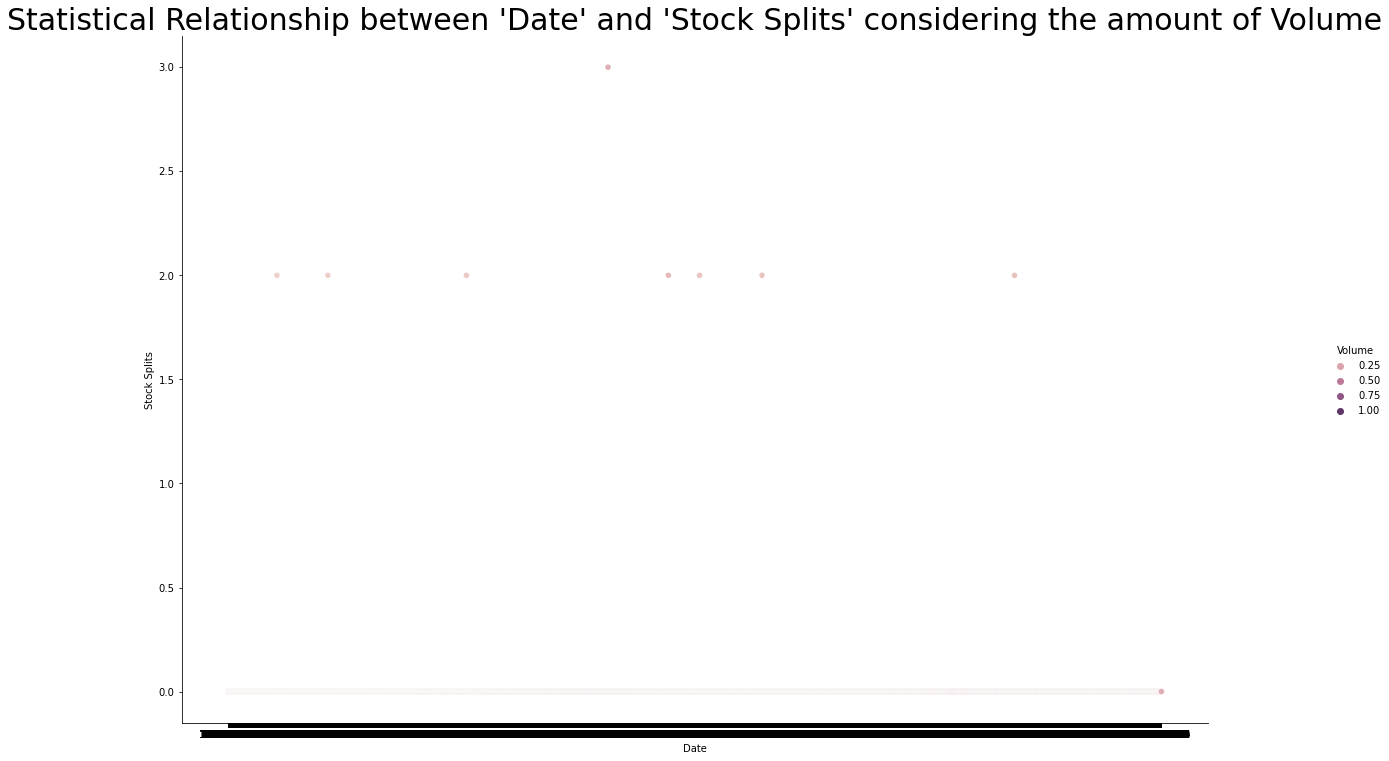

In [24]:
#plt.figure(figsize=(220,100))
for columnname in columnnames:
    sns.relplot(x='Date', y=columnname, hue='Volume', data=ff_dataset, height=10.27, aspect=10.7/7.27)
    plt.title("Statistical Relationship between 'Date' and '"+columnname+"' considering the amount of Volume", fontsize = 30)




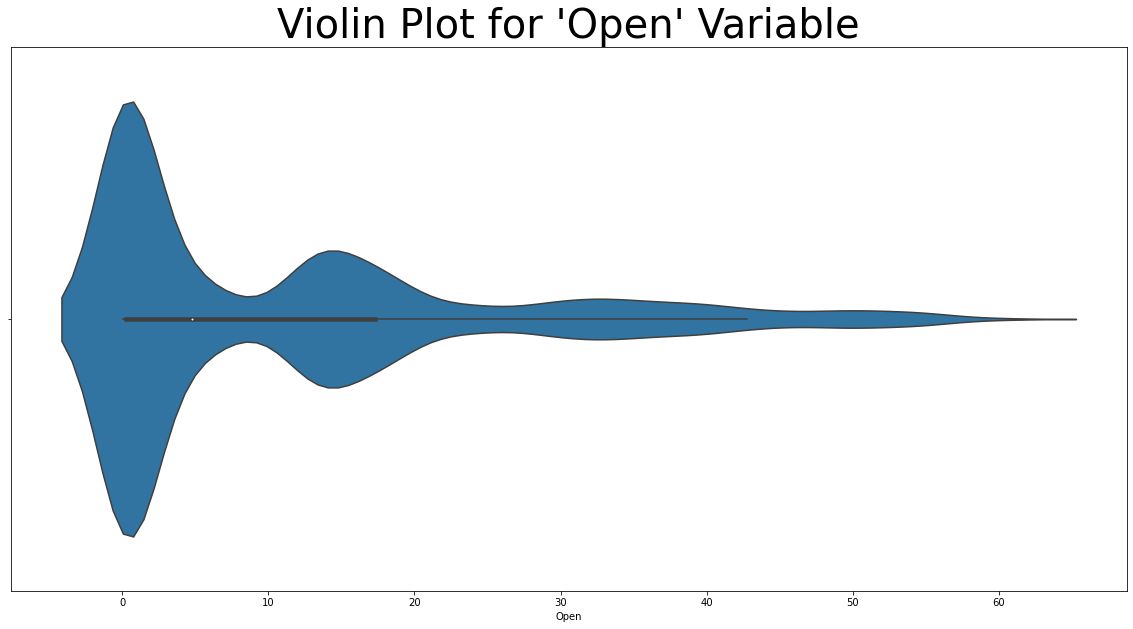

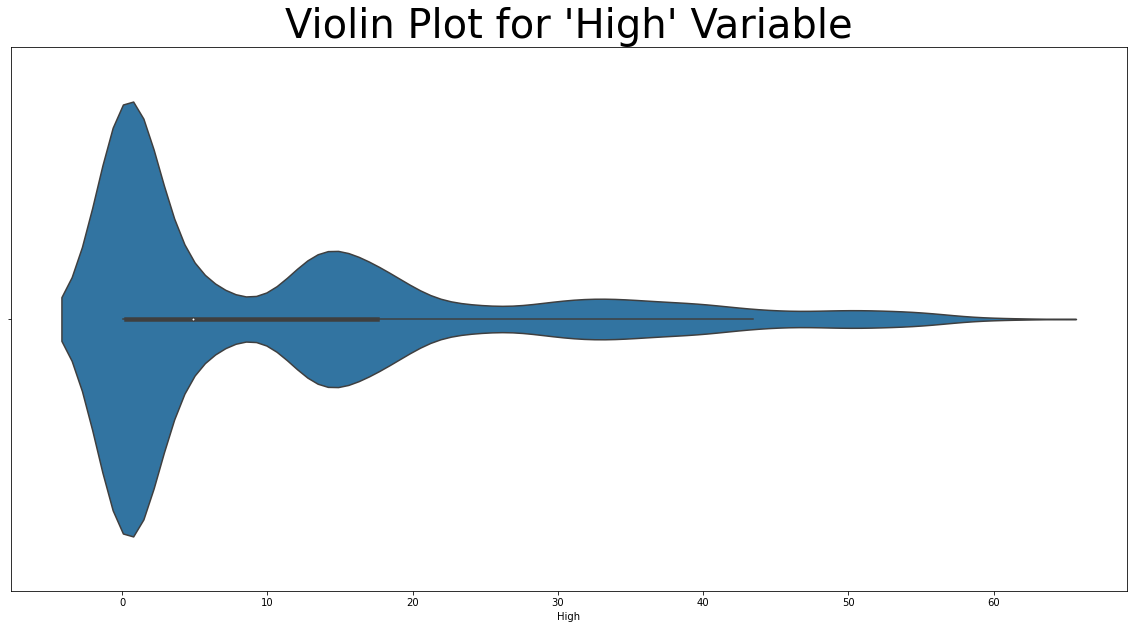

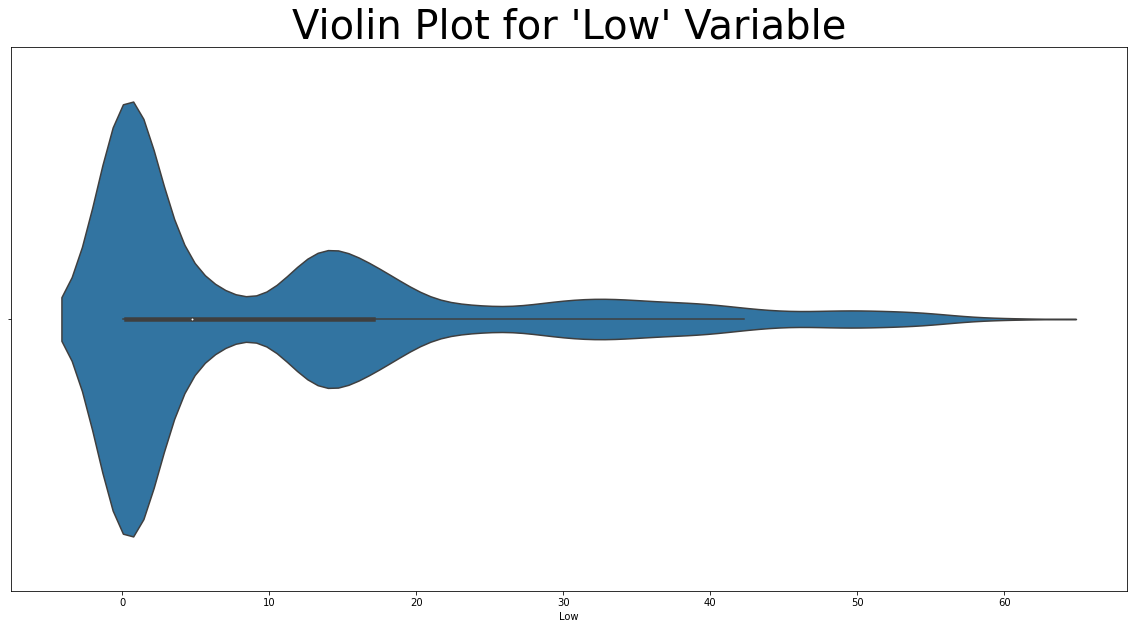

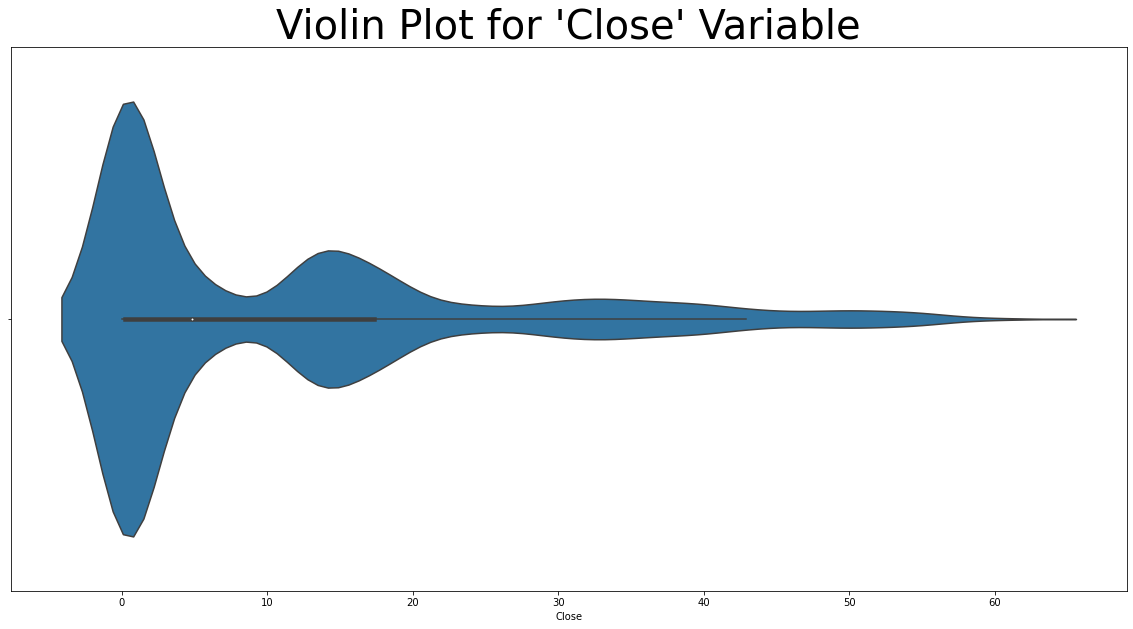

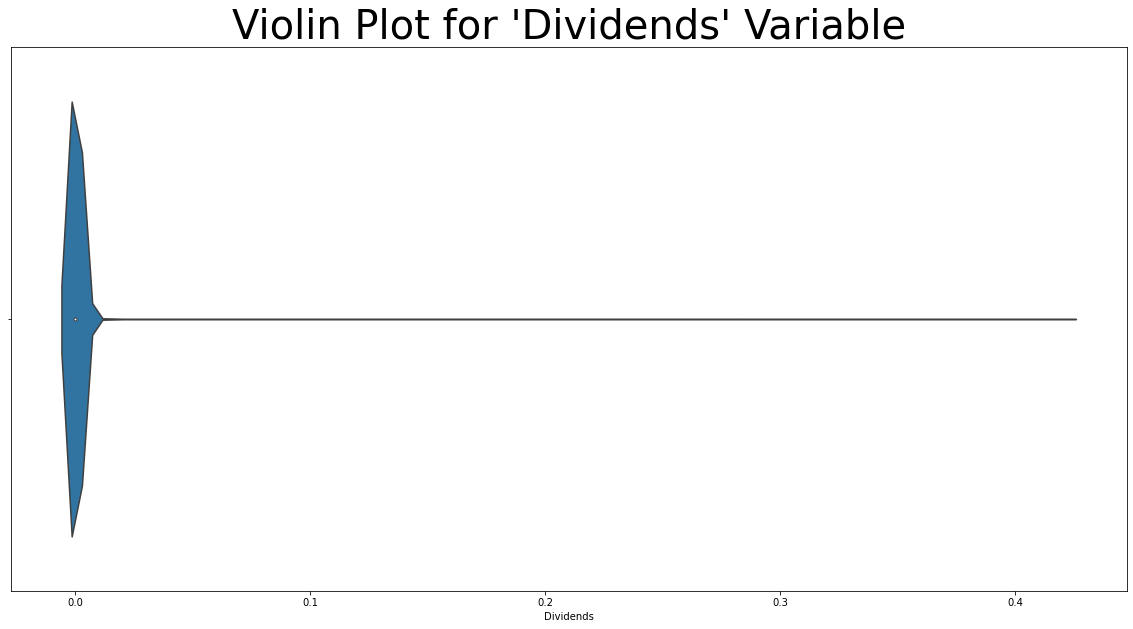

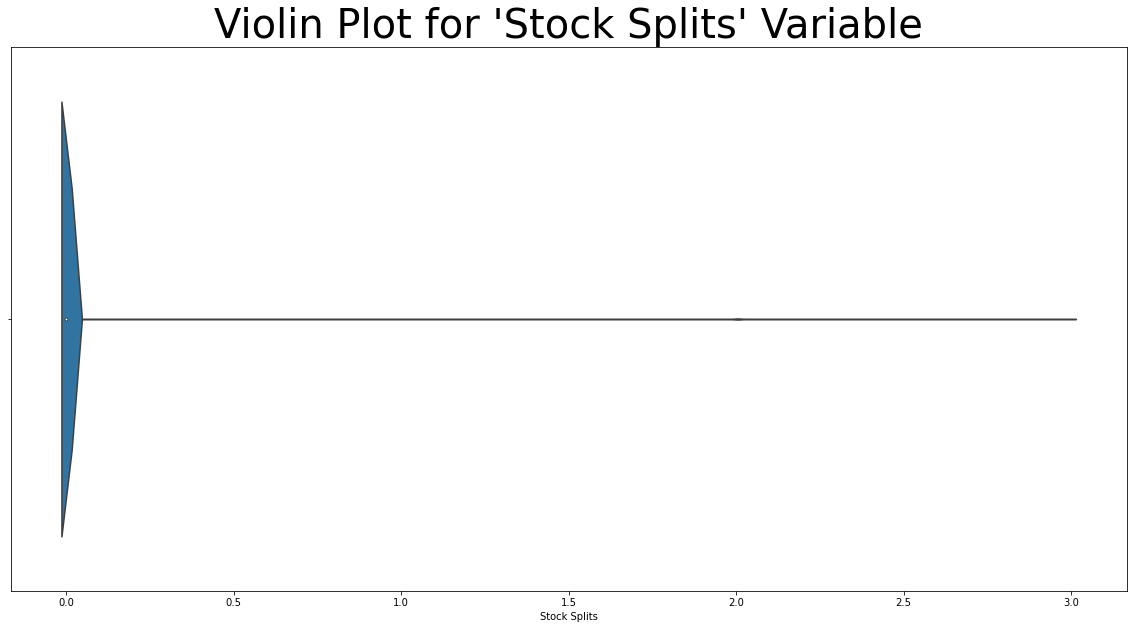

In [25]:
for columnname in columnnames:
  plt.figure(figsize=(20,10))
  sns.violinplot(x = columnname, data = ff_dataset)
  plt.title("Violin Plot for '"+ columnname+ "' Variable", fontsize = 40)
  plt.show()

In [1]:
dividend = pd.DataFrame(ff_dataset.groupby("Dividends").nunique().sort_values("Stock Splits", ascending=False).head())
#top_10

import plotly.express as px
segments = dividend
fig = px.pie(segments, 
             values = dividend["Dividends"],
            names = dividend.index,
            title = "Highest Dividends by Stock Splits",
            template = "seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

NameError: name 'pd' is not defined

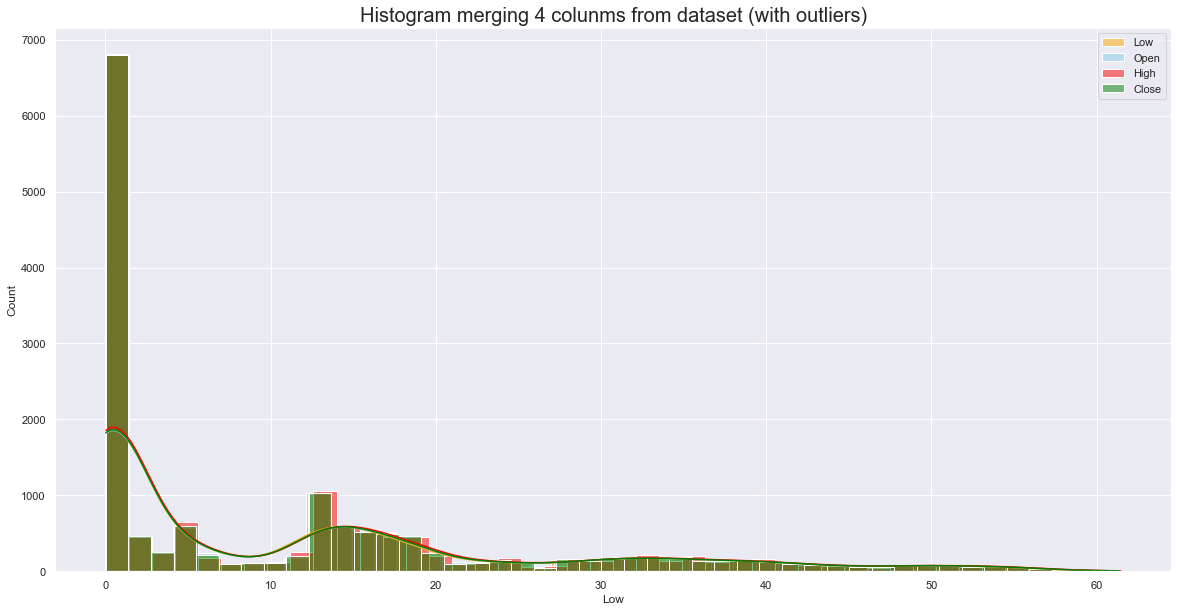

In [6]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.histplot(data=ff_dataset, x="Low", color="orange", label="Low", kde=True)
sns.histplot(data=ff_dataset, x="Open", color="skyblue", label="Open", kde=True)
sns.histplot(data=ff_dataset, x="High", color="red", label="High", kde=True)
sns.histplot(data=ff_dataset, x="Close", color="green", label="Close", kde=True)
plt.title("Histogram merging 4 colunms from dataset (with outliers)", fontsize = 20)
plt.legend() 
plt.show()

In [8]:
#Convert timestemps and dataset index
ff_dataset['Date'] = ff_dataset.index
ff_dataset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0
1,1,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0
2,2,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0
3,3,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0
4,4,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0


Identifying and removing outliers from dataset

In [9]:
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

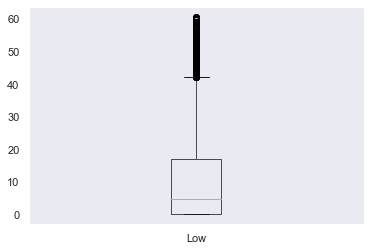

In [10]:
plot_boxplot(ff_dataset, "Low")

In [11]:
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
  return ls

In [12]:
index_list = []
for feature in ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']:
  index_list.extend(outliers(ff_dataset, feature))

In [13]:
def remove(df, ls):
  ls=sorted(set(ls))
  df=df.drop(ls)
  return df

In [14]:
df_cleaned = remove(ff_dataset, index_list)
df_cleaned.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,0.051133,0.052525,0.051133,0.051133,806400,0.0,0.0
1,1,0.050374,0.050374,0.049234,0.049994,1574400,0.0,0.0
2,2,0.050121,0.050753,0.050121,0.050374,844800,0.0,0.0
3,3,0.050374,0.051006,0.049108,0.049234,1420800,0.0,0.0
4,4,0.048855,0.048855,0.047779,0.048728,2035200,0.0,0.0


In [15]:
#dropping data column to not being incompatible with some processes
df_cleaned.drop('Date', axis=1, inplace=True)

In [16]:
df_cleaned.shape

(13795, 7)

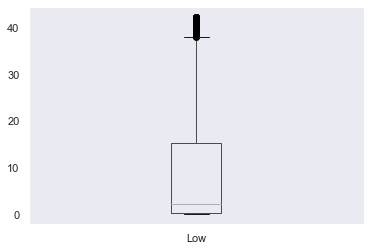

In [17]:
plot_boxplot(df_cleaned, 'Low')

In [18]:
df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13795 entries, 0 to 14724
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          13795 non-null  float64
 1   High          13795 non-null  float64
 2   Low           13795 non-null  float64
 3   Close         13795 non-null  float64
 4   Volume        13795 non-null  int64  
 5   Dividends     13795 non-null  float64
 6   Stock Splits  13795 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 862.2 KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,13795.000000,13795.000000,13795.000000,13795.000000,1.379500e+04,13795.0,13795.0
mean,9.274862,9.347434,9.203593,9.279235,8.051927e+06,0.0,0.0
std,11.604031,11.680781,11.531052,11.608803,6.313853e+06,0.0,0.0
min,0.037983,0.038112,0.035669,0.037855,7.680000e+04,0.0,0.0
25%,0.235188,0.236681,0.232742,0.235055,2.485700e+06,0.0,0.0
50%,2.313715,2.330338,2.285162,2.313715,6.947200e+06,0.0,0.0
75%,15.546090,15.766859,15.354241,15.543617,1.198245e+07,0.0,0.0
max,42.775526,43.080666,42.275808,42.870922,2.808600e+07,0.0,0.0


Text(0.5, 1.0, 'Scatterplot comparing incidences of High against Low from dataset without outliers')

<Figure size 576x288 with 0 Axes>

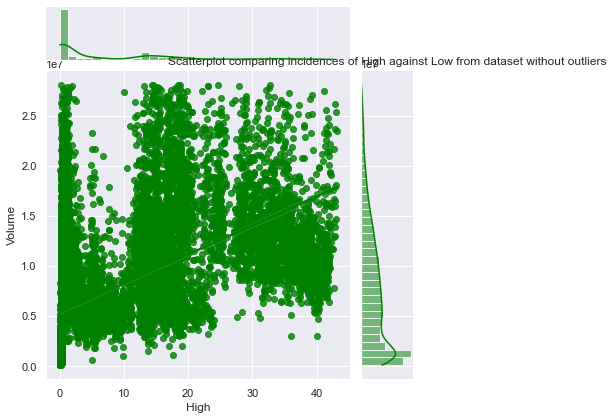

In [19]:
#Scatterplot comparing incidences of High against Low from dataset without outliers
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot (x='High', y='Volume', data=df_cleaned, kind='reg', color='green')
plt.title('Scatterplot comparing incidences of High against Low from dataset without outliers')

C:\Users\Dani\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:1106: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Dani\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:1106: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Dani\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:1106: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Dani\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:1106: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Dani\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:1106: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `wa

Text(0.5, 1.0, 'Pair Grid for dataset (without outliers)')

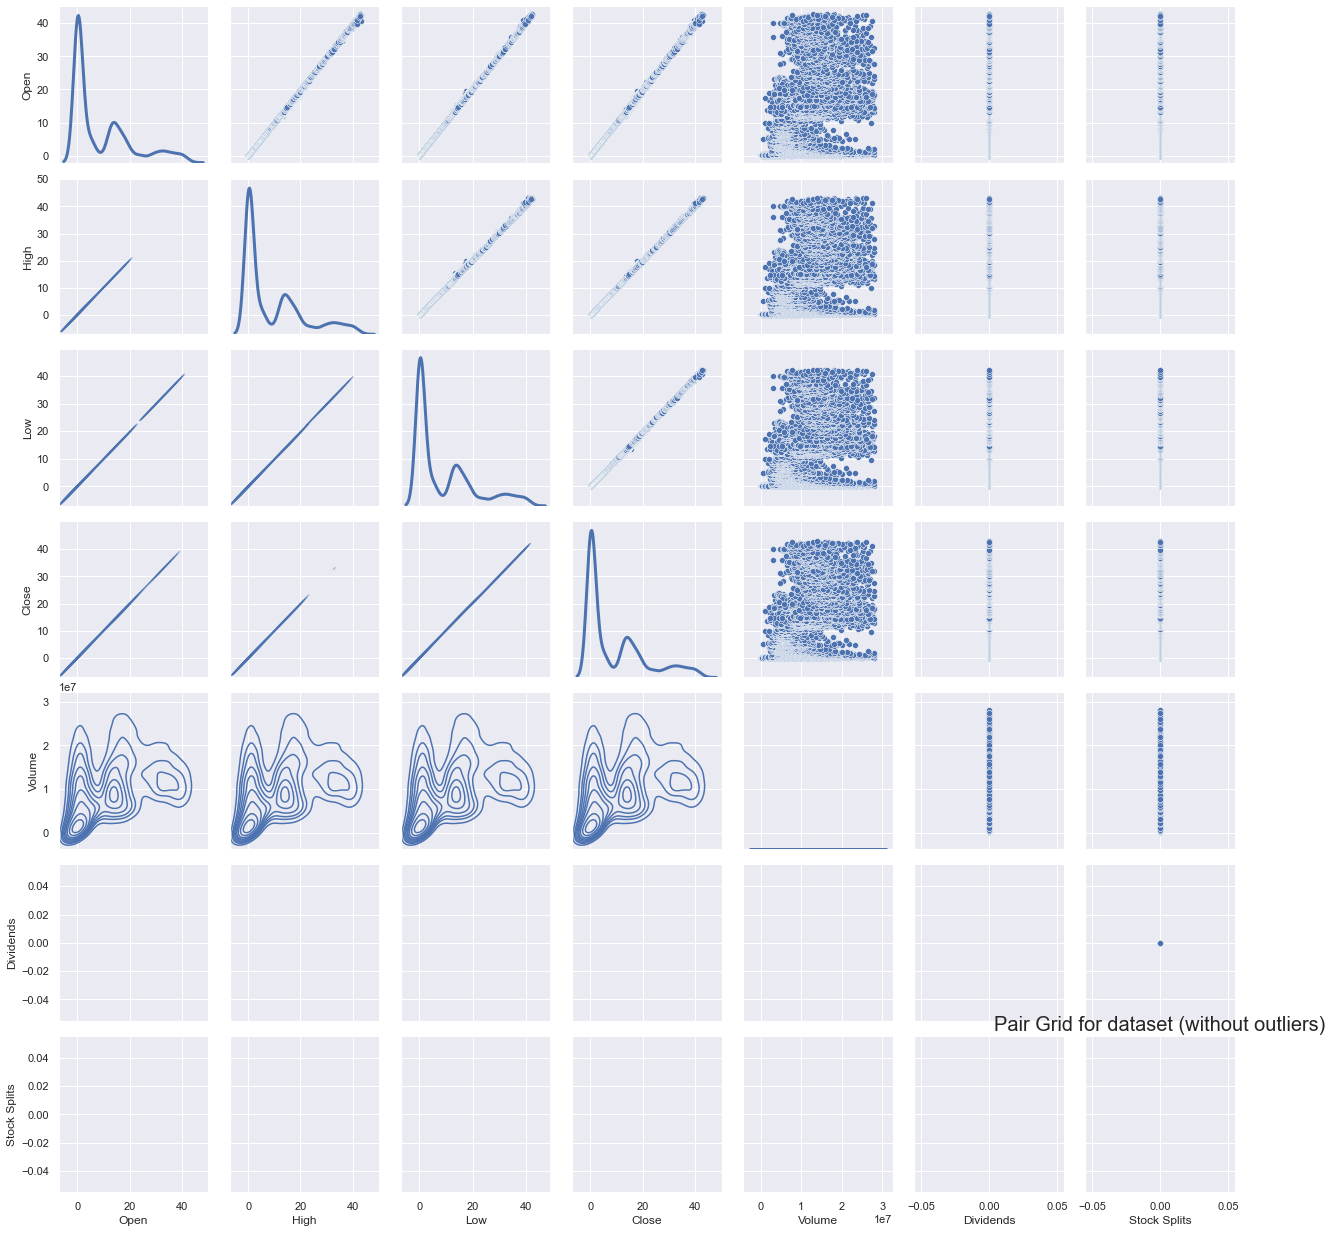

In [39]:
g = sns.PairGrid(df_cleaned)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False, warn_singular=False)
plt.title("Pair Grid for dataset (without outliers)", fontsize = 20)

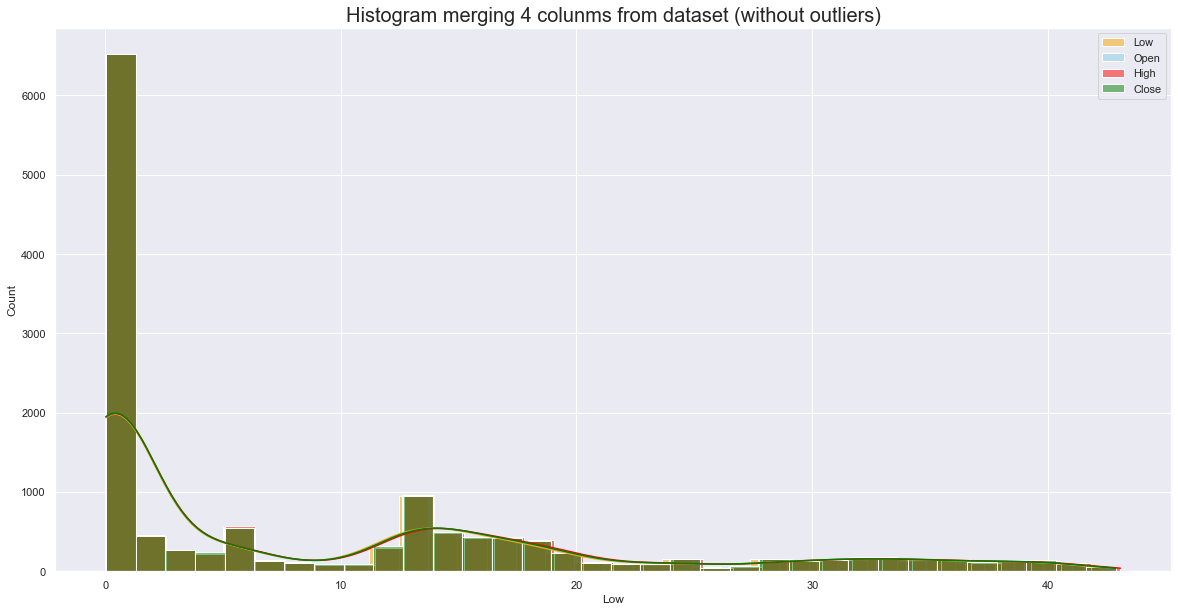

In [53]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.histplot(data=df_cleaned, x="Low", color="orange", label="Low", kde=True)
sns.histplot(data=df_cleaned, x="Open", color="skyblue", label="Open", kde=True)
sns.histplot(data=df_cleaned, x="High", color="red", label="High", kde=True)
sns.histplot(data=df_cleaned, x="Close", color="green", label="Close", kde=True)
plt.title("Histogram merging 4 colunms from dataset (without outliers)", fontsize = 20)
plt.legend() 
plt.show()

g = sns.PairGrid(df_cleaned, y_vars=["Volume"], x_vars=['Open', 'High', 'Low', 'Close', 'Dividends', 'Stock Splits'], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10])

In [23]:
df_cleaned.head

<bound method NDFrame.head of             Open       High        Low      Close    Volume  Dividends  \
0       0.051133   0.052525   0.051133   0.051133    806400        0.0   
1       0.050374   0.050374   0.049234   0.049994   1574400        0.0   
2       0.050121   0.050753   0.050121   0.050374    844800        0.0   
3       0.050374   0.051006   0.049108   0.049234   1420800        0.0   
4       0.048855   0.048855   0.047779   0.048728   2035200        0.0   
...          ...        ...        ...        ...       ...        ...   
14695  42.560593  42.863183  41.841953  42.116173  17839900        0.0   
14698  42.759169  42.844271  42.220188  42.579506  13008400        0.0   
14721  42.432004  42.918630  42.012166  42.870922  13829700        0.0   
14723  41.983543  42.527421  41.554165  42.327045  17603900        0.0   
14724  42.222084  42.775505  42.021709  42.632378  23679800        0.0   

       Stock Splits  
0               0.0  
1               0.0  
2              

Finished outliers process


Data Normalization


In [24]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()

Norm = scaler.fit_transform(df_cleaned)

print(Norm)
#Norm.shape
#sns.displot(Norm, kde=True, height=10.27, aspect=10.7/7.27)
#plt.title("Data Normalization for dataset (without outliers)", fontsize = 30)

[[6.34089866e-08 6.51353625e-08 6.34089866e-08 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.19954680e-08 3.19954680e-08 3.12718763e-08 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.93282737e-08 6.00773140e-08 5.93282737e-08 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.06817965e-06 3.10336666e-06 3.03782196e-06 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.38490012e-06 2.41579540e-06 2.36050905e-06 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.78304224e-06 1.80641326e-06 1.77458038e-06 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]


Min Max Scaler


In [25]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
MMscaled = scaler.fit_transform(df_cleaned)
print(MMscaled)
#sns.displot(MMscaled, kde=True, height=10.27, aspect=10.7/7.27)
#plt.title("Min Max Scaler for dataset (without outliers)", fontsize = 30)

[[3.07683333e-04 3.34865450e-04 3.66098649e-04 ... 2.60485840e-02
  0.00000000e+00 0.00000000e+00]
 [2.89915771e-04 2.84880233e-04 3.21151716e-04 ... 5.34681462e-02
  0.00000000e+00 0.00000000e+00]
 [2.83992659e-04 2.93700574e-04 3.42129003e-04 ... 2.74195621e-02
  0.00000000e+00 0.00000000e+00]
 ...
 [9.91962057e-01 9.96235435e-01 9.93758501e-01 ... 4.91013667e-01
  0.00000000e+00 0.00000000e+00]
 [9.81468684e-01 9.87146538e-01 9.82915708e-01 ... 6.25762250e-01
  0.00000000e+00 0.00000000e+00]
 [9.87050206e-01 9.92910234e-01 9.93984404e-01 ... 8.42687403e-01
  0.00000000e+00 0.00000000e+00]]


Data standardization

In [26]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
Sscaled = scaler.fit_transform(df_cleaned)
print(Sscaled)
#sns.displot(Sscaled, kind="kde", multiple="stack", height=10.27, aspect=10.7/7.27)
#plt.title("Data standardization for dataset (without outliers)", fontsize = 30)


[[-0.79490164 -0.79577266 -0.79375165 ... -1.14760177  0.
   0.        ]
 [-0.79496708 -0.79595686 -0.7939163  ... -1.02596007  0.
   0.        ]
 [-0.7949889  -0.79592436 -0.79383945 ... -1.14151968  0.
   0.        ]
 ...
 [ 2.85748504  2.87415831  2.84533985 ...  0.91512781  0.
   0.        ]
 [ 2.81883664  2.84066538  2.80561947 ...  1.51291439  0.
   0.        ]
 [ 2.83939408  2.86190482  2.8461674  ...  2.47526177  0.
   0.        ]]


Robust Scaler

In [27]:
# Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(df_cleaned)
Rscaler = scaler.transform(df_cleaned)
print(Rscaler)
#sns.displot(Rscaler, kind="kde", multiple="stack", height=10.27, aspect=10.7/7.27)
#plt.title("Robust Scaler for dataset (without outliers)", fontsize = 30)

[[-0.14777588 -0.14667008 -0.14773861 ... -0.64662121  0.
   0.        ]
 [-0.14782547 -0.14680862 -0.14786417 ... -0.56575144  0.
   0.        ]
 [-0.14784201 -0.14678417 -0.14780557 ... -0.64257772  0.
   0.        ]
 ...
 [ 2.62024344  2.61351108  2.62718694 ...  0.72472162  0.
   0.        ]
 [ 2.59095313  2.58832081  2.59689887 ...  1.12214179  0.
   0.        ]
 [ 2.60653291  2.60429514  2.62781797 ...  1.76192908  0.
   0.        ]]


Text(0.5, 1.0, 'Data Normalization for dataset (without outliers)')

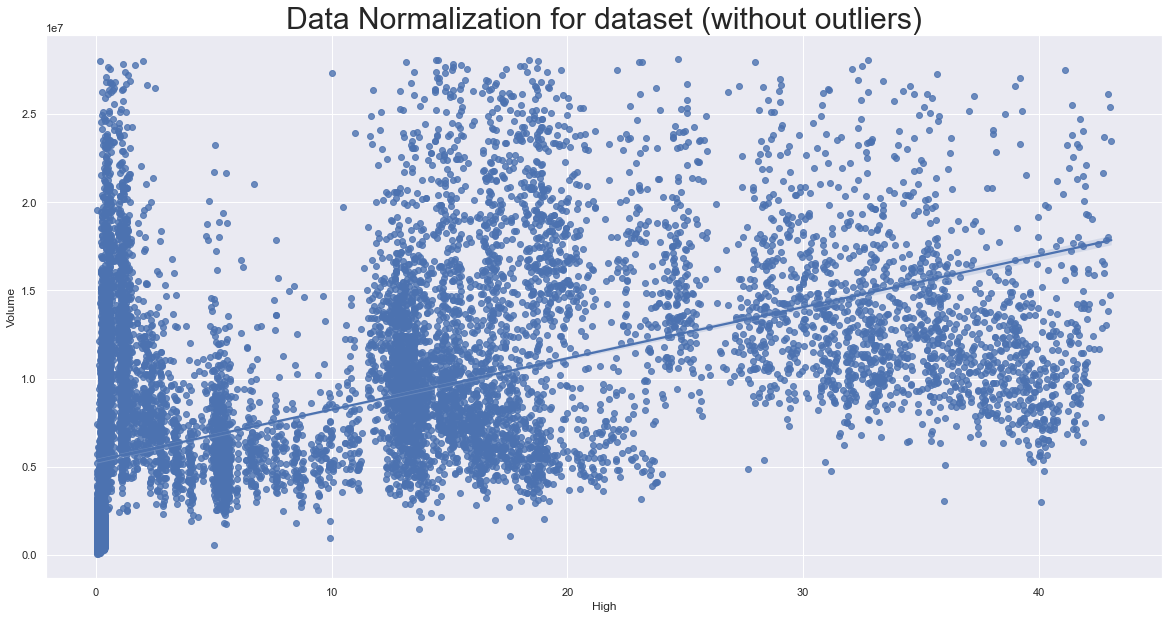

In [28]:
#Data Normalization for dataset (without outliers)
plt.figure(figsize=(20,10))
ax = sns.regplot(x="High", y="Volume", data=df_cleaned)
plt.title("Data Normalization for dataset (without outliers)", fontsize = 30)

Function for Model Evaluation

In [29]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(6,6)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')

Pre Processing, defining Train and Test Also checking dimension

In [30]:
X = ff_dataset.drop('Open', axis = 1)
y = ff_dataset['Open']
X.shape

(15122, 7)

In [31]:
y.shape

(15122,)

In [32]:
#Train size 80%, test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
X_train.shape


(12097, 7)

In [34]:
y_train.shape

(12097,)

In [35]:
X_test.shape

(3025, 7)

In [36]:
y_test.shape

(3025,)

References

https://www.stackvidhya.com/how-to-add-header-to-pandas-dataframe/;
https://www.addoptics.nl/optics-explained/refractive-index/
https://analyticsindiamag.com/exploring-dataprep-a-python-library-for-data-preparation-eda/#:~:text=DataPrep%20is%20an%20open%2Dsource,solved%20and%20taken%20care%20of.
https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
https://dzone.com/articles/python-class-attributes-vs-instance-attributes#:~:text=A%20class%20attribute%20is%20a,.)%20%2C%20of%20the%20class.
https://machinelearningmastery.com/difference-test-validation-datasets/
https://stringfixer.com/pt/Training_data
https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html
https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
https://baipureddyneeraj.medium.com/glass-classification-using-various-machine-learning-techniques-cf268fd520d6
https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html
https://community.developers.refinitiv.com/questions/71300/python-time-series-convert-date-index-to-pandas-co.html
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
https://moonbooks.org/Articles/How-to-increase-the-size-of-the-cells-text-annotations-of-a-seaborn-heatmap-in-python-/
https://seaborn.pydata.org/generated/seaborn.violinplot.html
https://deepnote.com/@econdesousa/ViolinPlotvsBoxPlot-aadf0c53-53b4-4221-89b9-4388c54c68bd
https://stackabuse.com/seaborn-violin-plot-tutorial-and-examples/
https://seaborn.pydata.org/tutorial/distributions.html
https://seaborn.pydata.org/tutorial/relational.html